In [1]:
import pandas as pd
import textblob 
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 

In [2]:
df = pd.read_csv('../input/squid-games-tweets-dataset-for-preprocessing/tweet.csv')

In [3]:
df.describe()

,user_followers,user_friends,user_favourites
count,8.001900e+04,8.001900e+04,8.001900e+04
mean,1.794587e+04,1.071020e+03,1.796449e+04
std,2.451159e+05,6.751348e+03,4.850358e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.180000e+02,4.420000e+02
50%,2.910000e+02,3.930000e+02,3.028000e+03
75%,1.183000e+03,9.860000e+02,1.494000e+04
max,1.684642e+07,1.211576e+06,1.144792e+06


In [4]:
df.shape

(80019, 12)

In [5]:
# Removing emoji's
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ndr-ratd niggh,nan,@ManUtd die hard\n\n\nYOLO\n\n\nJ'ai besoin de...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,nan,nan,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me.,Twitter for Android,False
2,marcie,nan,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [6]:
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,polarity,subjectivity
0,the _ndr-ratd niggh,nan,@ManUtd die hard\n\n\nYOLO\n\n\nJ'ai besoin de...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False,-0.200,0.262500
1,Best uncle on planet earth,nan,nan,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me.,Twitter for Android,False,0.000,0.000000
2,marcie,nan,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False,0.000,0.000000
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False,-0.200,0.400000
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False,-0.225,0.272222


In [7]:
l=[]
for i in df["polarity"]:
    if(i > 0.5):
        l.append('Positive')
    elif(i < 0.5):
        l.append('Negative')
    else:
        l.append('Neutral')
df["Sentiment"]=l

In [8]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text'].head()

0    When life hits time poverty strikes Gong Yoo :...
1            That marble episode #SquidGame ruined me.
2                                      #Squidgame time
3    //Blood 1st slide I'm joining squidgame thing,...
4    The two first games, players killed mask guys ...
Name: text, dtype: object

In [9]:
pd.set_option('display.max_colwidth',1000)

In [10]:
df[['text','Sentiment']].head()

,text,Sentiment
0,When life hits time poverty strikes Gong Yoo : Lets play game #SquidGame #Netflix https://t.co/Cx7ifmZ8cN,Negative
1,That marble episode #SquidGame ruined me.,Negative
2,#Squidgame time,Negative
3,"//Blood 1st slide I'm joining squidgame thing, I'm already dead sugar honeycomb ofc #SquidGame https://t.co/N4UGv9hxx8",Negative
4,"The two first games, players killed mask guys ; bloody night third game, killed https://t.co/Qf057XDJ7C",Negative


In [11]:
def design_main():
    plt.xticks(rotation=0)
    plt.title('Number and Type of comments in dataset', color = 'red')
    plt.xlabel('Sentiment Count', color = 'red')
    plt.ylabel('Count', color = 'red')

Negative    70495
Positive     6516
Neutral      3008
Name: Sentiment, dtype: int64


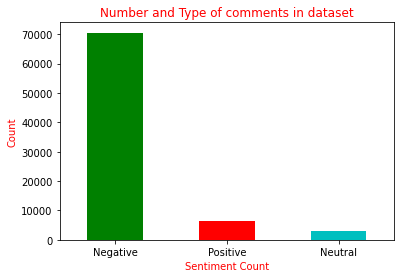

In [12]:
print(df['Sentiment'].value_counts())

df.Sentiment.value_counts().plot(kind ='bar', color =['g','r','c'])
design_main()

In [13]:
from collections import Counter
Counter(" ".join(df["text"]).split()).most_common(10)

[('#SquidGame', 50371),
 ('I', 18892),
 ('Squid', 8172),
 ('#squidgame', 7931),
 ('Game', 5615),
 ('The', 5050),
 ('game', 4914),
 ('.', 4057),
 ('like', 3488),
 ('watching', 3376)]

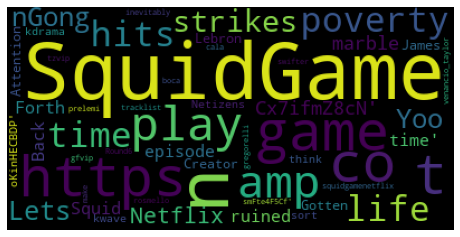

In [14]:
df = pd.read_csv('../input/squid-games-tweets-dataset-for-preprocessing/tweet.csv')

text = df['text'].values 

wordcloud2 = WordCloud().generate(str(text))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()